# Maps

# Note

Before running the script, download the file containing the water depths in the current directory: https://bit.ly/3vqJAHt.

# Reference

Reference: https://github.com/poplarShift/ice-edge/blob/master/iceedge_analysis.ipynb.

# Environment

This notebook was run in a dedicated conda environment.
The environment specifications are exported into a YAML file.
Create the environment from the environment.yml file:

`conda env create -f ../binder/environment.yml`

Activate the new environment:

`conda activate python3`

Verify that the new environment was installed correctly:

`conda env list`

Reference: https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file.

# Load libraries

In [1]:
import cartopy
import cartopy.crs as ccrs

import collections

import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np

from scipy.io import loadmat

# Function

In [2]:
'''latlon2xy convenience function to convert latlon to chosen projection,
and figure object'''
def latlon2xy(lon,lat,proj):
    xyz = proj.transform_points(ccrs.PlateCarree(),lon,lat).squeeze()
    x,y,_ = np.split(xyz,3,axis=len(xyz.shape)-1)
    x[np.isinf(x)]=np.nan
    y[np.isinf(y)]=np.nan
    return x.squeeze(),y.squeeze()

# Stations

In [3]:
# STATIONS
Station=collections.namedtuple(
    'Station','lon lat marker  markeredgecolor markerfacecolor markersize')
station1=Station(-60.3919999999999,68.3096,'o','none','red',5)
station2=Station(-61.463,68.0358,'o','none','red',5)
station3=Station(-62.355,67.8668,'o','none','red',5)
station4=Station(-63.5639999999999,67.54,'o','none','red',5)
station5=Station(-63.783,67.482,'*','black','yellow',10) # GE SIC
station6=Station(-64.638,67.239,'o','none','red',5)
stations=[station1,station2,station3,station4,station5,station6]

# Map of CCGS Amundsen 2018 mission, leg 2b,  on one figure

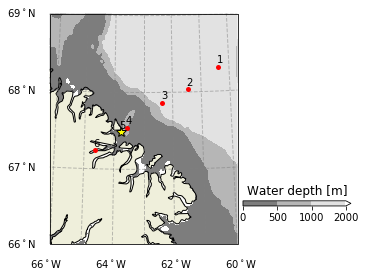

In [4]:
plotbathymetry=True

fig = plt.subplots()[0]

# map of Amundsen 2018 mission
proj1 = ccrs.LambertConformal(central_longitude=-63, central_latitude=67.5,standard_parallels=(67,68))
ax1 = plt.axes(projection = proj1)
hc=ax1.coastlines(resolution='10m')
ax1.add_feature(cartopy.feature.LAND)
if not plotbathymetry:
    ax1.add_feature(cartopy.feature.OCEAN)
MapExtent = [-66,-60,66,69]
ax1.set_extent(MapExtent, ccrs.PlateCarree())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                   linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(-68,-58))
gl.ylocator = mticker.FixedLocator(np.arange(65,70))

# STATIONS
for station in stations:
    xstation,ystation = latlon2xy(np.array([station.lon]),
                                  np.array([station.lat]),
                                  proj1)
    marker=station.marker
    markerfacecolor=station.markerfacecolor
    markersize=station.markersize
    markeredgecolor=station.markeredgecolor
    ax1.plot(xstation,ystation,marker,markeredgecolor=markeredgecolor,
             markerfacecolor=markerfacecolor,markersize=markersize)
    
# LONGITUDE LABELS
y0,_ = ax1.get_ylim()
for lon in [-66,-64,-62,-60]:
    x0,_ = proj1.transform_point(lon,MapExtent[2]-1,
                                 src_crs = ccrs.PlateCarree())
    plt.text(x0,y0-2e4,'{:2d}$^\circ$W'.format(-lon),
             horizontalalignment = 'center',verticalalignment='top')

# LATITUDE LABELS
x0,_ = ax1.get_xlim()
someLons = np.arange(-80,-50)
for lat in np.arange(66,69+1):
    # interpolate latitude circle to map boundary
    xyzArray = proj1.transform_points(ccrs.PlateCarree(),
                                      someLons,lat*np.ones_like(someLons))
    x = xyzArray[:,0]
    y = xyzArray[:,1]
    y0 = np.interp(x0,x,y)
    plt.text(x0-2e4,y0,'{:2d}$^\circ$N'.format(lat),
             horizontalalignment = 'right',verticalalignment='center')

cmap = plt.cm.get_cmap('Greys')
cmap = cmap.from_list('Custom cmap', [cmap(i) for i in range(150,50,-1)], 100)
cmap.set_over('white')
bounds = [0,500,1000,2000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# load IBCAO bathymetry
if plotbathymetry:
    top = loadmat('IBCAO_1min_bathy.mat')
    lon,lat=np.meshgrid(top['x'],top['y'])
    z=-top['IBCAO_1min']
    hb1=ax1.contourf(*latlon2xy(lon,lat,proj1),z,
                     levels=[0,500,1000,2000],
                     cmap=cmap,norm=norm,extend='max')
    axcb1= fig.colorbar(hb1,ax=ax1,orientation='horizontal')
    axcb1.ax.set_title('Water depth [m]')
    axcb1.ax.set_position([.58,.05,.25,.2])
    
# LABELS FOR STATIONS
for i,station in enumerate(stations):
    xstation,ystation = latlon2xy(np.array([station.lon]),
                                  np.array([station.lat]),
                                  proj1)
    ax1.text(xstation+3e3,ystation+1e4,i+1,
            horizontalalignment = 'center',verticalalignment='center',
            fontsize=10)

ax1.set_position([.1,.1,.5,.8])

plt.savefig('amundsen2018_map.png',dpi=200)

# 2 maps of Baffin Bay on the same figure

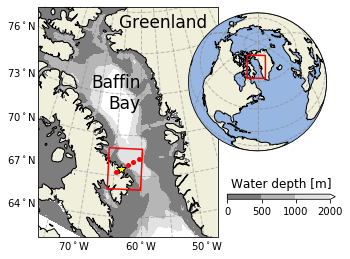

In [5]:
plotbathymetry=True

fig = plt.subplots()[0]

# Baffin Bay map
proj2 = ccrs.LambertConformal(central_longitude=-60, central_latitude=70,standard_parallels=(65,75))
ax2 = plt.axes(projection = proj2)
hc=ax2.coastlines(resolution='50m')
ax2.add_feature(cartopy.feature.LAND)
if not plotbathymetry:
    ax2.add_feature(cartopy.feature.OCEAN)
MapExtent = [-76,-48,62,79]
ax2.set_extent(MapExtent, ccrs.PlateCarree())
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                   linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-80,-75,-70,-65,-60,-55,-50,-45,-40,-35])
gl.ylocator = mticker.FixedLocator(np.arange(58,84,3))

# STATIONS
for station in stations:
    xstation,ystation = latlon2xy(np.array([station.lon]),
                                  np.array([station.lat]),
                                  proj2)
    marker=station.marker
    markerfacecolor=station.markerfacecolor
    markersize=station.markersize
    markeredgecolor=station.markeredgecolor
    ax2.plot(xstation,ystation,marker,markeredgecolor=markeredgecolor,
             markerfacecolor=markerfacecolor,markersize=markersize)

# LONGITUDE LABELS
y0,_ = ax2.get_ylim()
for lon in [-70,-60,-50]:
    x0,_ = proj2.transform_point(lon,MapExtent[2]-1,
                                 src_crs = ccrs.PlateCarree())
    plt.text(x0,y0-2e4,'{:2d}$^\circ$W'.format(-lon),
             horizontalalignment = 'center',verticalalignment='top')

# LATITUDE LABELS
x0,_ = ax2.get_xlim()
someLons = np.arange(-120,-40,1)
for lat in np.arange(64,78,3):
    # interpolate latitude circle to map boundary
    xyzArray = proj2.transform_points(ccrs.PlateCarree(),
                                      someLons,lat*np.ones_like(someLons))
    x = xyzArray[:,0]
    y = xyzArray[:,1]
    y0 = np.interp(x0,x,y)
    plt.text(x0-2e4,y0,'{:2d}$^\circ$N'.format(lat),
             horizontalalignment = 'right',verticalalignment='center')

cmap = plt.cm.get_cmap('Greys')
cmap = cmap.from_list('Custom cmap', [cmap(i) for i in range(150,50,-1)], 100)
cmap.set_over('white')
bounds = [0,500,1000,2000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# load IBCAO bathymetry
if plotbathymetry:
    top = loadmat('IBCAO_1min_bathy.mat')
    lon,lat=np.meshgrid(top['x'],top['y'])
    z=-top['IBCAO_1min']
    hb2=ax2.contourf(*latlon2xy(lon,lat,proj2),z,
                     levels=[0,500,1000,2000],
                     cmap=cmap,norm=norm,extend='max')
    axcb2= fig.colorbar(hb2,ax=ax2,orientation='horizontal')
    axcb2.ax.set_title('Water depth [m]')

# TEXT
greenland_lon,greenland_lat = -38, 77
ax2.text(greenland_lon,greenland_lat,'Greenland',
         horizontalalignment = 'right',fontsize=17,
         transform=ccrs.PlateCarree())
baffinbay_lon,baffinbay_lat = -60, 72
ax2.text(baffinbay_lon,baffinbay_lat,'Baffin\nBay',
         horizontalalignment = 'right',fontsize=17,
         transform=ccrs.PlateCarree())

# RECTANGLE
extentStudyarea = ax1.get_extent()
vertices = np.array([
    [extentStudyarea[0], extentStudyarea[2]], # left, bottom
    [extentStudyarea[0], extentStudyarea[3]], # left, top
    [extentStudyarea[1], extentStudyarea[3]], # right, top
    [extentStudyarea[1], extentStudyarea[2]], # right, bottom
    [extentStudyarea[0], extentStudyarea[2]]
    ])
xVert,yVert = vertices.transpose()
xBox = np.interp(np.arange(0,4,.02),np.arange(0,4.1,1),xVert)
yBox = np.interp(np.arange(0,4,.02),np.arange(0,4.1,1),yVert)
xyzBoxLatlon = ccrs.PlateCarree().transform_points(ax1.projection,
                                                   xBox,yBox)
xBoxLatlon = xyzBoxLatlon[:,0]
yBoxLatlon = xyzBoxLatlon[:,1]
xyzBoxTransformed = proj2.transform_points(ccrs.PlateCarree(),
                                           xBoxLatlon,yBoxLatlon)
xBoxTransformed = xyzBoxTransformed[:,0]
yBoxTransformed = xyzBoxTransformed[:,1]
ax2.plot(xBoxTransformed,yBoxTransformed,'r')
ax2.relim()
    
# World map
proj3 = ccrs.NearsidePerspective(central_longitude=-60,
                                 central_latitude=60)
ax3 = fig.add_subplot(122,projection = proj3)
ax3.set_global()
ax3.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax3.add_feature(cartopy.feature.OCEAN)
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                   linewidth=1, color='gray', alpha=0.5,
                   linestyle='--')
extentStudyarea = ax2.get_extent()
vertices = np.array([
    [extentStudyarea[0], extentStudyarea[2]], # left, bottom
    [extentStudyarea[0], extentStudyarea[3]], # left, top
    [extentStudyarea[1], extentStudyarea[3]], # right, top
    [extentStudyarea[1], extentStudyarea[2]], # right, bottom
    [extentStudyarea[0], extentStudyarea[2]]
    ])
xVert,yVert = vertices.transpose()
xBox = np.interp(np.arange(0,4,.02),np.arange(0,4.1,1),xVert)
yBox = np.interp(np.arange(0,4,.02),np.arange(0,4.1,1),yVert)
xyzBoxLatlon = ccrs.PlateCarree().transform_points(ax2.projection,
                                                   xBox,yBox)
xBoxLatlon = xyzBoxLatlon[:,0]
yBoxLatlon = xyzBoxLatlon[:,1]
xyzBoxTransformed = proj3.transform_points(ccrs.PlateCarree(),
                                           xBoxLatlon,yBoxLatlon)
xBoxTransformed = xyzBoxTransformed[:,0]
yBoxTransformed = xyzBoxTransformed[:,1]
ax3.plot(xBoxTransformed,yBoxTransformed,'r')
ax3.relim()
ax3.autoscale_view()
ax2.set_position([.1,.1,.5,.8])
ax3.set_position([.4,.4,.5,.48])
if plotbathymetry:
    axcb2.ax.set_position([.58,.05,.25,.2])

plt.savefig('BaffinBay_and_world_map.png',dpi=200)